In [1]:
import pandas as pd
df=pd.read_csv("emotion.csv")
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [2]:
df.head(20)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2


In [3]:
df.shape

(16000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [5]:
df.label.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

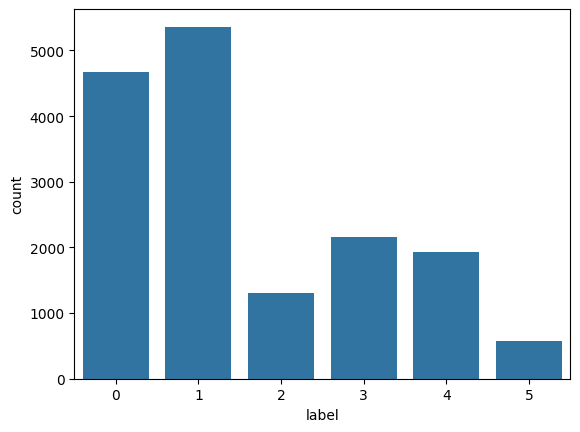

In [6]:
import seaborn as sns
sns.countplot(x=df.label)

In [7]:
df.isna().sum()

text     0
label    0
dtype: int64

In [8]:
df['text '] = df['text'].apply(lambda x: "".join(x.lower() for x in x.split()))

In [9]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['text '] = df['text'].apply(lambda x: "".join(x.lower() for x in x.split()))

In [10]:
!pip install textblob


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: text, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
X=tfid.fit_transform(df['text'])
X=X.toarray()
y=df.label.values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=0)

In [14]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model=model.fit(X_train, y_train)
pred=model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, pred))

[[290 116 115 148 172  64]
 [174 392 193  95 132  67]
 [ 48  60 102  15  33  13]
 [ 83  86  53 148  56  33]
 [ 83  63  39  37 146  29]
 [ 23  16  11   5  19  41]]


In [16]:
print(accuracy_score(y_test, pred))

0.3496875


In [17]:
from sklearn.ensemble import RandomForestClassifier
clr=RandomForestClassifier()
clr.fit(X_train,y_train)
rf=clr.predict(X_test).astype(int)

In [18]:
print(confusion_matrix(y_test, rf))

[[793  75   5  13  17   2]
 [ 29 987  18   9   7   3]
 [  4  90 174   2   1   0]
 [ 38  52   2 363   4   0]
 [ 15  35   2  26 308  11]
 [  2  16   0   0  13  84]]


In [20]:
print(accuracy_score(y_test,rf))

0.8465625
